In [ ]:
import numpy as np
import matplotlib.pyplot as plt



```
# This is formatted as code
```

# **Integrate and Fire model with Relative Refractory period**

In [ ]:
# @title Parameters of the model
curr = 4  # this time the current is constant [nA]
r = 10      # [MOhm]
Vtl = -55   # lower value of Vt  [mV]
Vth = 0     # higher value of Vt  [mV]
Vres = -65  # [mV]
tao = 30   # [ms]
tao_t = 30  #[ms]

In [ ]:
dt = 0.01   #integration step
tin = 0     #initial instant
tfin = 200  # final instant
t = np.arange(tin,tfin+dt,dt)  # time vector
n = len(t)
# INITIALIZATION of the state variables:
V = np.zeros(n)  # the membrane potential
Vt = np.zeros(n) # the threshold potential
t_spike = []
#Initial values:
V[0]=Vres
Vt[0] = Vtl
print(V,Vt)  # to see if they are correctly initialized

[-65.   0.   0. ...   0.   0.   0.] [-55.   0.   0. ...   0.   0.   0.]


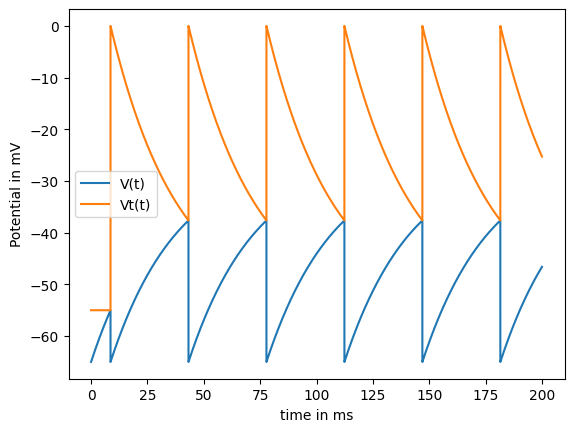

In [ ]:
# @title Solution of the differential equations
Vinf = r*curr + Vres
for i in range(0,n-1):
  V[i+1] = V[i]+(Vinf-V[i])*dt/tao  # Explicit Euler for V
  Vt[i+1] = Vt[i]+dt*(-Vt[i] + Vtl)/tao_t  # Explicit Euler for Vt
  if V[i+1] > Vt[i+1]:   # instant of the spike
    V[i+1] = Vres  # V goes back to the reset value (-65mV)
    Vt[i+1]=Vth    # -> REFRACTORY PERIOD
    t_spike = np.append(t_spike,i+1)  # spike instants update

plt.plot(t,V)
plt.plot(t,Vt)
plt.xlabel('time in ms')
plt.ylabel('Potential in mV')
plt.legend(['V(t)','Vt(t)'])


*Repetition of the test with different const current values. => DISCHARGE CURRENT FREQUENCY*

---





Text(0.5, 1.0, 'discharge current frequency with RRP (Vt as state variable)')

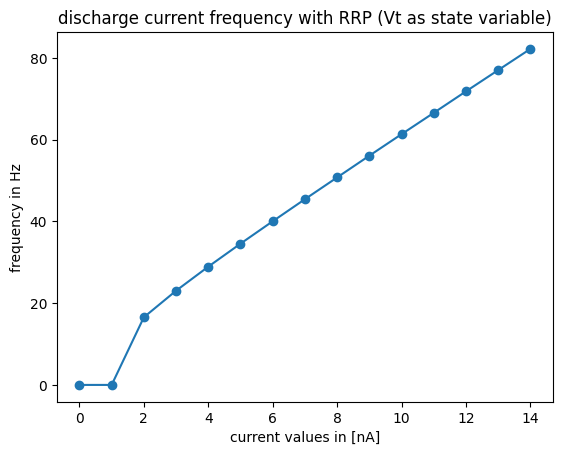

In [ ]:
curr = np.arange(0,14+1,1)
disch_freq = np.zeros(len(curr))

for idx, currvalue in enumerate(curr):
  Vinf = r*currvalue + Vres
  V = np.zeros(n)
  Vt = np.zeros(n)
  t_spike = []
  V[0]=Vres
  Vt[0] = Vtl
  for i in range(0,n-1):
    V[i+1] = V[i]+(Vinf-V[i])*dt/tao
    Vt[i+1] = Vt[i]+dt*(-Vt[i]/tao_t + Vtl/tao_t)
    if V[i+1] > Vt[i+1]:
      V[i+1] = Vres
      Vt[i+1]=Vth
      t_spike = np.append(t_spike,i+1)
  if len(t_spike) == 0:
    disch_freq[idx]=0
  else:
    disch_freq[idx]= 1/(t[int(t_spike[-1])]-t[int(t_spike[-2])]) * 1000  # discharge current frequency in [hz]

plt.plot(curr,disch_freq,'-o')
plt.xlabel('current values in [nA]')
plt.ylabel('frequency in Hz')
plt.title('discharge current frequency with RRP (Vt as state variable)')


Text(0.5, 1.0, 'discharge current frequency without the RRP (Vt constant)')

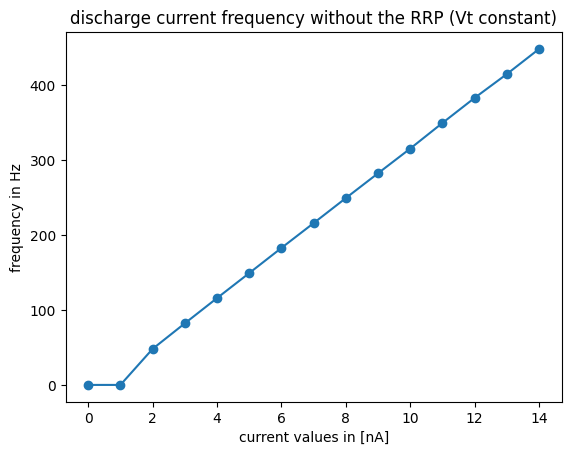

In [ ]:
curr = np.arange(0,14+1,1)
disch_freq = np.zeros(len(curr))
Vt_ = -55  # constant threshold

for idx, currvalue in enumerate(curr):
  Vinf = r*currvalue + Vres
  V = np.zeros(n)
  t_spike = []
  V[0]=Vres
  for i in range(0,n-1):
    V[i+1] = V[i]+(Vinf-V[i])*dt/tao
    if V[i+1] > Vt_:
      V[i+1] = Vres
      t_spike = np.append(t_spike,i+1)
  if len(t_spike) == 0:
    disch_freq[idx]=0
  else:
    disch_freq[idx]= 1/(t[int(t_spike[-1])]-t[int(t_spike[-2])]) * 1000  # discharge current frequency in [hz]

plt.plot(curr,disch_freq,'-o')
plt.xlabel('current values in [nA]')
plt.ylabel('frequency in Hz')
plt.title('discharge current frequency without the RRP (Vt constant)')